In [30]:
!unzip Cat.zip
!mv ResizedCat Cat

Archive:  Cat.zip
replace ResizedCat/image3814.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [31]:
!unzip Dog.zip
!mv ResizedDog Dog

Archive:  Dog.zip
replace ResizedDog/image3814.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [17]:
#!pip install --upgrade pip
%pip install pandas numpy matplotlib scikit-learn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 11.5 MB 13.6 MB/s            
     |████████████████████████████████| 7.3 MB 7.1 MB/s            
     |████████████████████████████████| 8.7 MB 7.9 MB/s            
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 65 kB 4.4 MB/s            
  Using cached fonttools-4.34.4-py3-none-any.whl (944 kB)
     |████████████████████████████████| 3.1 MB 11.8 MB/s            
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
     |████████████████████████████████| 58.4 MB 383 kB/s             
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  DEPRECATION: Configuring installation 

In [22]:
%pip install tensorflow

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [42]:
# Step 0. Load libraries and custom modules
# System --------------------------------------------------------
import os
import pathlib
# Dataframes and matrices ---------------------------------------
import numpy as np
import pandas as pd
# Graphics ------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Machine learning ----------------------------------------------
from sklearn.model_selection import train_test_split
# Deep learning -------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D,Dense,Dropout, Flatten
from tensorflow.python.keras.layers import Activation
#from tensorflow.python.keras.layers import Activation, BatchNormalization
from tensorflow.python.keras.layers import MaxPooling2D
#from tensorflow.python.keras import datasets, layers, models
from tensorflow.python.keras import layers, models
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import get_file
from keras.utils import image_dataset_from_directory

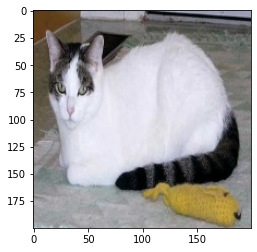

In [43]:
# Sample a cat image
sample_cat = mpimg.imread('Cat/image3814.jpg')
plt.imshow(sample_cat)
plt.show()

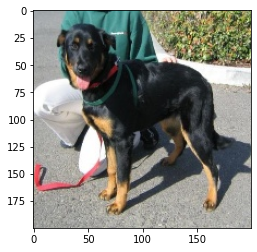

In [44]:
# Sample a dog image
sample_dog = mpimg.imread('Dog/image8941.jpg')
plt.imshow(sample_dog)
plt.show()

In [45]:
# Count total images
data_dir = pathlib.Path('./Pets')
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

0

In [46]:
# Let's follow this tutorial: https://www.tensorflow.org/tutorials/load_data/images
# Create train dataset
IMAGE_WITDH = 200
IMAGE_HEIGHT = 200
BATCH_SIZE = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(200, 200),
  batch_size=32)

NotFoundError: Could not find directory Pets

In [35]:
# Create validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(200, 200),
  batch_size=32)

Found 24946 files belonging to 2 classes.
Using 4989 files for validation.


In [36]:
# Read the classes
class_names = train_ds.class_names
print(class_names)

['Cat', 'Dog']


In [38]:
# Create the deep learning architecture
IMAGE_CHANNELS=3
IMAGE_WIDTH=200
IMAGE_HEIGHT=200
model = Sequential([

Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Flatten(),
Dense(512, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(1, activation='sigmoid'), # 2 because we have cat and dog classes
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 198, 198, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 99, 99, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 97, 97, 64)      

In [39]:
# Fit the model
history=model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
624/624 [==============================] - 681s 1s/step - loss: 0.6773 - accuracy: 0.6697 - val_loss: 0.5172 - val_accuracy: 0.7476
Epoch 2/10
624/624 [==============================] - 681s 1s/step - loss: 0.4913 - accuracy: 0.7645 - val_loss: 0.6911 - val_accuracy: 0.6675
Epoch 3/10
624/624 [==============================] - 676s 1s/step - loss: 0.4238 - accuracy: 0.8058 - val_loss: 0.5371 - val_accuracy: 0.7492
Epoch 4/10
624/624 [==============================] - 671s 1s/step - loss: 0.3847 - accuracy: 0.8244 - val_loss: 0.6315 - val_accuracy: 0.7260
Epoch 5/10
624/624 [==============================] - 683s 1s/step - loss: 0.3272 - accuracy: 0.8572 - val_loss: 0.4854 - val_accuracy: 0.7891
Epoch 6/10
624/624 [==============================] - 685s 1s/step - loss: 0.2645 - accuracy: 0.8880 - val_loss: 0.5477 - val_accuracy: 0.7879
Epoch 7/10
624/624 [==============================] - 689s 1s/step - loss: 0.2066 - accuracy: 0.9145 - val_loss: 1.1224 - val_accuracy: 0.6977